#Details
*  Submitted By : Prajna P N
*  Email ID: prajnaneerchal7@gmail.com
*  Alternate Email ID:prajnaraipn@gmail.com
*  References : Rohan Shravan class notes/EIP sessions and Online Tutorials

# **Import Libraries and modules**

###Importing all the relevant libraries required

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
#We are creating train test split after loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


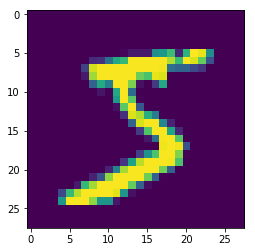

In [4]:
#printing the structure of xtrain[shape of the dataframe]
print (X_train.shape)
#matplotlib is a library which is used for visualizing the data
from matplotlib import pyplot as plt
#to show the plot inline, within the cell
%matplotlib inline
plt.imshow(X_train[30])

In [0]:
#Reshape function is use to reshape the image to 1D or any dimension
#28,28 image size and 1 channel
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#to convert our data type to float32 and normalize our data values to the range [0, 1].
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
#Looking at the label data
#Let's take a look at the labels for the first 10 training samples:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

###Defining Model Architecture
**I have included batchnormalization after each layer, not includeed after the transition layer

**Dropout is done after 3rd layer and 6th layer .I have not used drop out after max pooling, I feel that it reduces the features further by making kernels not active and already max pooling reduces the features and further 20% we are not considering(parameters) so its a hell lot of loss is what I think


In [45]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))#GRF - 3
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#GRF -5
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) #GRF -7
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2))) #GRF-14
model.add(Convolution2D(16, 3, 3, activation='relu'))#GRF -16
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#GRF -18
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(10, 3, 3, activation='relu')) #GRF -20
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#GRF -22
model.add(BatchNormalization())
model.add(Convolution2D(10, 3)) #GRF-24
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: 

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_62 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_63 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_64 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_18 (Dropout)         (None, 22, 22, 32)        0         
__________

###Compiling the Model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

###Fitting the model
I have played with batch size and epochs.I have considered batch size as 64 and 40 epochs

In [48]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.2763 - acc: 0.9152
Epoch 2/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0696 - acc: 0.9784
Epoch 3/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0519 - acc: 0.9838
Epoch 4/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.0441 - acc: 0.9863
Epoch 5/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0415 - acc: 0.9867
Epoch 6/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0355 - acc: 0.9889
Epoch 7/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.0318 - acc: 0.9894
Epoch 8/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0316 - acc: 0.9899
Epoch 9/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0295 - acc: 0.9904
Epoch 10/20
60000/60000 [==============================] - 12s 193us/step - loss: 

In [51]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1)

Epoch 1/20
  576/60000 [..............................] - ETA: 15s - loss: 0.0101 - acc: 0.9965

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 13s 212us/step - loss: 0.0144 - acc: 0.9954
Epoch 2/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0141 - acc: 0.9955
Epoch 3/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.0150 - acc: 0.9949
Epoch 4/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.0150 - acc: 0.9951
Epoch 5/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0129 - acc: 0.9957
Epoch 6/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.0125 - acc: 0.9958
Epoch 7/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0136 - acc: 0.9956
Epoch 8/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0120 - acc: 0.9958
Epoch 9/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0116 - acc: 0.9960
Epoch 10/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0112 - ac

###Printing the Validation Accuracy 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [53]:
print(score)

[0.025811972817048445, 0.9943]


In [0]:
y_pred = model.predict(X_test)

In [55]:
print(y_pred[:9])
print(y_test[:9])

[[4.1676138e-11 5.9526482e-08 4.4471424e-08 3.5151937e-09 5.4958423e-06
  3.0152744e-12 4.9197354e-14 9.9999440e-01 4.3057997e-15 6.0207539e-10]
 [2.5772746e-09 2.6667479e-07 9.9999976e-01 6.9690048e-12 1.0992859e-09
  2.7408244e-11 2.0152939e-08 2.0699968e-10 4.7065776e-12 8.4328051e-15]
 [8.9995666e-10 9.9999988e-01 1.3045905e-09 6.0102713e-12 4.8702660e-08
  2.6131042e-11 7.7102344e-12 3.5932672e-08 1.1483045e-11 1.9094192e-11]
 [9.9999774e-01 1.9166865e-08 1.0093563e-08 2.6657265e-10 2.4934065e-08
  7.6677398e-10 2.1591336e-06 2.1553380e-08 1.8293512e-08 9.6005710e-09]
 [2.0657412e-14 9.3239298e-11 1.6199229e-14 2.0014140e-14 1.0000000e+00
  9.7161619e-18 2.7456687e-12 4.5532904e-11 2.4361792e-14 2.1176900e-08]
 [8.4432024e-11 9.9999964e-01 4.0459958e-11 2.3523809e-12 5.5549986e-08
  2.4361067e-12 4.4952955e-13 2.7639888e-07 2.0690828e-12 1.6520419e-11]
 [5.6297442e-09 4.0380178e-06 2.7546340e-10 2.3995181e-12 9.9998975e-01
  5.6383887e-11 3.5882090e-07 1.1113093e-07 2.8782781e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

###This code shows the feature extracted at various convolution layers

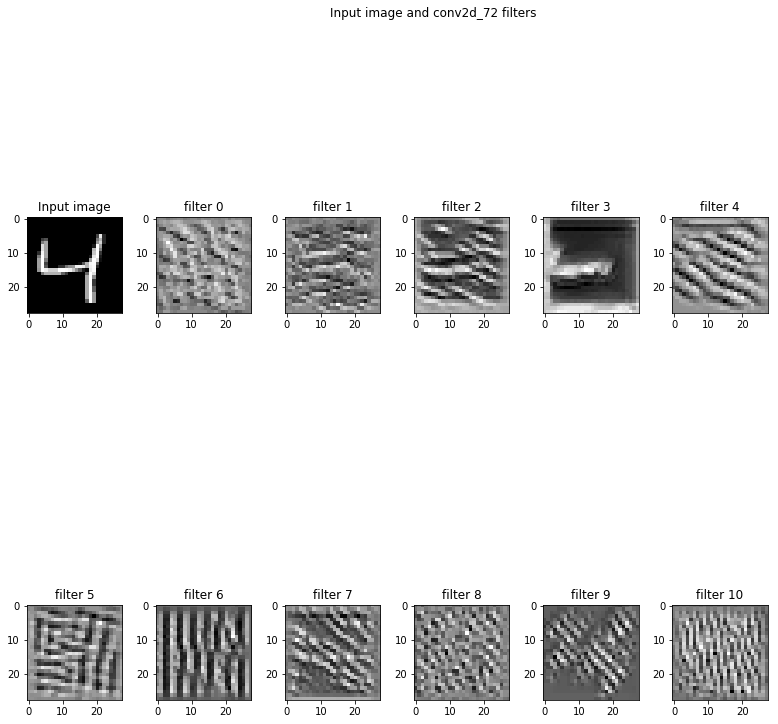

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_72'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

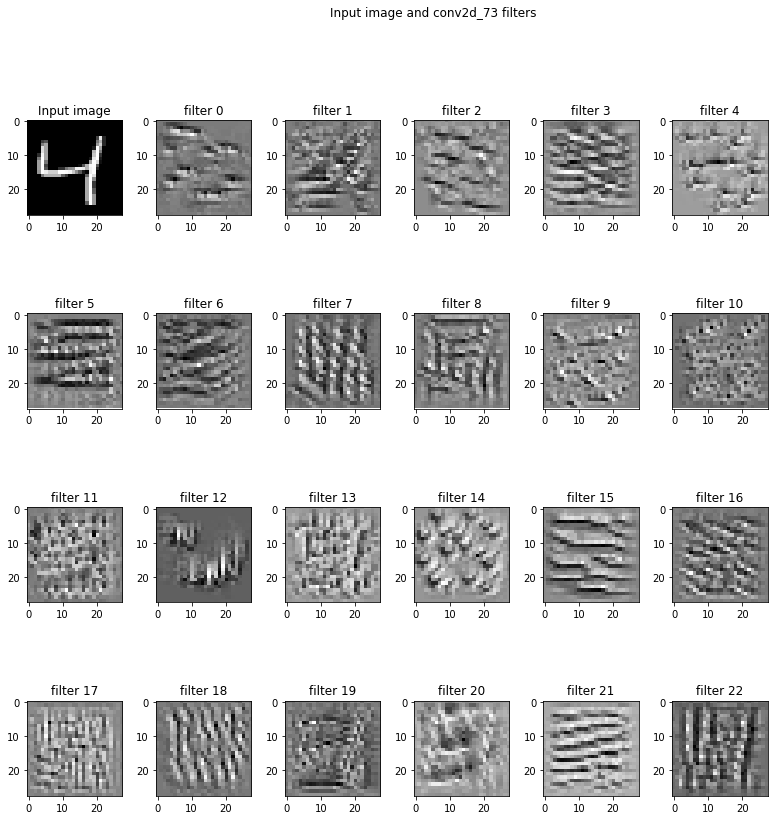

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_73'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

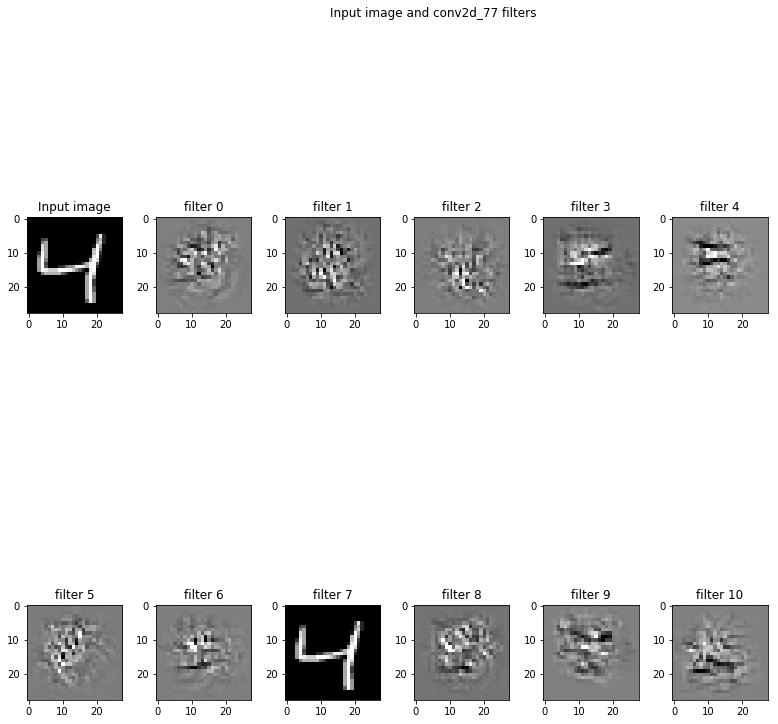

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_77'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()